# **CSPE-28 Data Science - Assignment -II**

**Submitted By:**

- 106117044 - Lisa R 
- 106117068 - Naveena P
- 106117069 - Navin Elamparithi P
- 106117098 - Sruthi Susan Kuriakose
- 106117110 - Voleti Lakshmi Sravani

# **1. Do the following for the given dataset:**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

### ***a. Visualize  the  dataset using  a  plot(Library:Seaborn  and Matplotlib)and  apply Decision Tree Algorithm***
####*Calculate the following evaluation metrics*  
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix 

####*Discuss what you observe*

In [ ]:
names_col = ['Height','Weight']
names_target = ['Gender']

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Dataset/features.csv', names=names_col,low_memory = False);
target = pd.read_csv('/content/drive/My Drive/Dataset/target.csv', names=names_target, low_memory = False);

In [ ]:
data.head()

,Height,Weight
0,1.417837e+06,130.331364
1,1.170866e+06,114.834354
2,1.326528e+06,52.048800
3,1.436353e+06,56.271637
4,1.667446e+06,112.761949


In [ ]:
target.head()

,Gender
0,Male
1,Female
2,Female
3,Female
4,Male


In [ ]:
data.shape

(500, 2)

In [ ]:
target.shape

(500, 1)

In [ ]:
gender={'Male':0,'Female':1}
target['g']=[gender[item] for item in target.Gender] 
data['target']=[gender[item] for item in target.Gender] 
feature_names=['Height','Weight']

In [ ]:
data.head()

,Height,Weight,target
0,1.417837e+06,130.331364,0
1,1.170866e+06,114.834354,1
2,1.326528e+06,52.048800,1
3,1.436353e+06,56.271637,1
4,1.667446e+06,112.761949,0


In [ ]:
X_1 = data[data['target']==0]
#X_1.shape 	#(177, 3)
for col in X_1:
   print(col ,X_1[col].max())
   print(col ,X_1[col].min())

Height 1697523.5523204391
Height 1351293.6113557713
Weight 149.6884282972653
Weight 70.429773883002
target 0
target 0


In [ ]:
X_2 = data[data['target']==1]
#X_2.shape	#(323, 3)
for col in X_2:
   print(col ,X_2[col].max())
   print(col ,X_2[col].min())

Height 1698357.3804618346
Height 1001434.8199976957
Weight 149.97721268166703
Weight 40.13958895974204
target 1
target 1


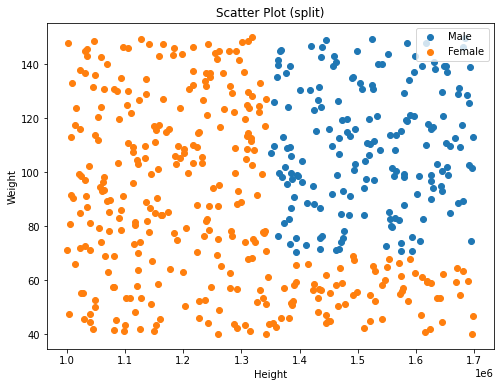

In [ ]:
#Using matplotlib -                         
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X_1['Height'], X_1['Weight'], label='Male')
plt.scatter(X_2['Height'], X_2['Weight'], label='Female')
plt.title("Scatter Plot (split)")
plt.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c6d720588>,
      dtype=object)

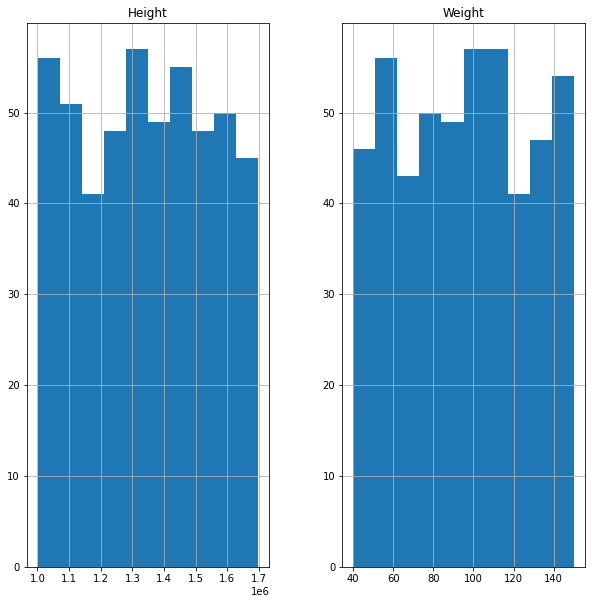

In [ ]:
data.hist(     column=["Height", "Weight"],
   figsize=(10, 10)
)


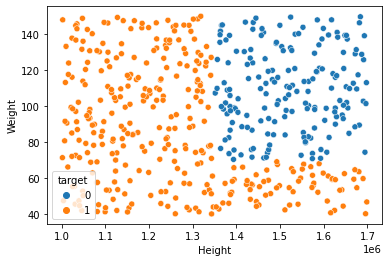

In [ ]:
import seaborn as sns
sns.scatterplot(x='Height',y='Weight',hue = 'target',data=data)

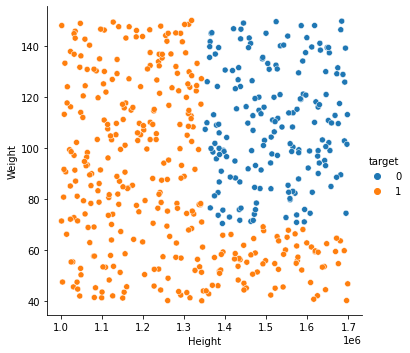

In [ ]:
sns.relplot(x='Height',y='Weight',hue = 'target',data=data)

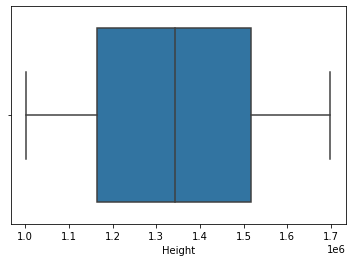

In [ ]:
sns.boxplot(x=data['Height']) 

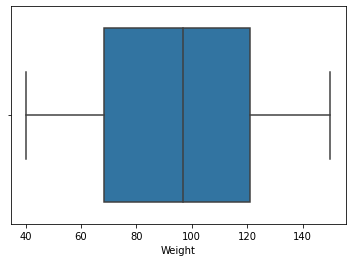

In [ ]:
sns.boxplot(x=data['Weight']) 

####***Decision Tree Algorithm***

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X=pd.read_csv('/content/drive/My Drive/Dataset/features.csv', names=names_col,low_memory = False);
y=target = pd.read_csv('/content/drive/My Drive/Dataset/target.csv', names=names_target, low_memory = False);
y['Gender'] = y['Gender'].map({'Male': 0,'Female': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=24)

In [ ]:
y_train.head()

,Gender
219,0
79,0
443,1
292,0
218,1


In [ ]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
model1 = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = model1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


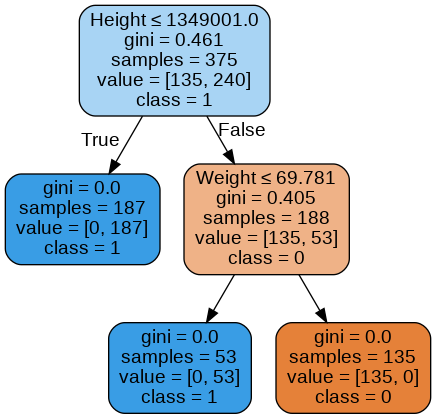

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('find_gender.png')
Image(graph.create_png())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[42  0]
 [ 0 83]]


In [ ]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))
print("Precision score : ", metrics.precision_score(y_test, y_pred, average='macro' ))
print("Recall score : ", metrics.recall_score(y_test, y_pred, average='macro' ))
print("F1 score : ", metrics.f1_score(y_test, y_pred, average='macro' ))

#print("Confusion matrix : \n", metrics.confusion_matrix(y_test, y_pred))


Accuracy :  1.0
Precision score :  1.0
Recall score :  1.0
F1 score :  1.0


####***Inference***
*We split the dataset into train and test (80-20 split). 
We then evaluate the model and find that the model is 100% accurate. This is probably because the features show a clear divison among the categories.* 

---


*Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The precision score for the model developed is 1.0. 
Recall refers to the percentage of total relevant results correctly classified by your algorithm. The recall score of the model developed is 1.0
F-score or F-measure is a measure of a test's accuracy. The f1 score obtained for this model is 1.0
Confusion matrix C is such that Cij is equal to the number of observations known to be in group i and predicted to be in group j. Thus (0,0) represents (m, m); (0,1) represents (m, f); (1,0) represents (f,m) and (1,1) represents (f,f).*

###***b. Apply k-Nearest  Neighbour  algorithm on the given dataset***
####*Calculate the  following  evaluation  metrics* 
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix 
####*Discuss what you observe*

In [ ]:
from sklearn.model_selection import train_test_split
X=pd.read_csv('/content/drive/My Drive/Dataset/features.csv', names=names_col,low_memory = False);
y=target = pd.read_csv('/content/drive/My Drive/Dataset/target.csv', names=names_target, low_memory = False);


In [ ]:
y.head()

,Gender
0,Male
1,Female
2,Female
3,Female
4,Male


In [ ]:
X.shape

(500, 2)

In [ ]:
y['Gender'] = y['Gender'].map({'Male': 0,'Female': 1})
y.head()

,Gender
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# Let us randomly choose k value to see how the accuracy is 
k = 3  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=3 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=3 is 0.78


Minimum error:- 0.17 at K = 8


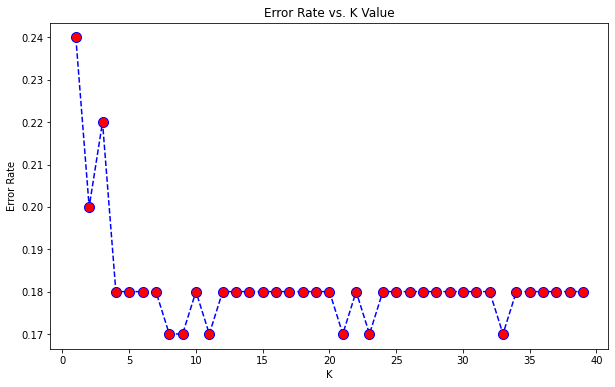

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)

In [ ]:
k = 8  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.83


In [ ]:
print("Precision score : ", metrics.precision_score(y_test, y_pred, average='macro' ))

Precision score :  0.8333333333333333


In [ ]:
print("Recall score : ", metrics.recall_score(y_test, y_pred, average='macro' ))

Recall score :  0.8712121212121212


In [ ]:
print("F1 score : ", metrics.f1_score(y_test, y_pred, average='macro' ))

F1 score :  0.8260869565217391


In [ ]:
print("Confusion matrix : \n", metrics.confusion_matrix(y_test, y_pred))

Confusion matrix : 
 [[34  0]
 [17 49]]


####***Inference***
*We are splitting the data set into train and test into 80-20 parts, meaning we use 80% of the data to train the dataset with the model and 20% of the data to test the model. K value for the KNN classifier is calculated using the Euclidean distance and that value of k that gives the minimum error rate is the optimal one. We then evaluate the model and find that the model is **83%** accurate. Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The precision score for the model developed is **0.8333333333333333**. Recall refers to the percentage of total relevant results correctly classified by your algorithm. The recall score of the model developed is **0.8712121212121212**. F-score or F-measure is a measure of a test's accuracy. The f1 score obtained for this model is **0.8260869565217391**. Confusion matrix C is such that Cij is equal to the number of observations known to be in group i and predicted to be in group j. Thus (0,0) represents (m, m); (0,1) represents (m, f); (1,0) represents (f,m) and (1,1) represents (f,f).*

###***d. Plot ROC curves and calculate the corresponding AUC values for Section 1. b and discuss what you observe***

####***1.b***

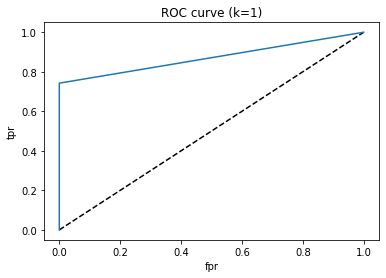

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve (k=1)')
plt.show()

In [ ]:
print("AUC : ", metrics.roc_auc_score(y_test,y_pred))

AUC :  0.8712121212121212


####***Inference***
*ROC is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test. The closer the curve is in the upper diagonal, the more accurate the test. The area under the curve is a measure of test accuracy. Thus we can say that the model is 87.12121212121212% accurate.*

###***c. Apply Min-Max Normalization on the given dataset and visualize it using a plot; Then, repeat Section “1. b” fully on the Normalized dataset***

In [ ]:
from sklearn.model_selection import train_test_split
X=pd.read_csv('/content/drive/My Drive/Dataset/features.csv', names=names_col,low_memory = False);
Y2=target = pd.read_csv('/content/drive/My Drive/Dataset/target.csv', names=names_target, low_memory = False);

In [ ]:
X.head()

,Height,Weight
0,1.417837e+06,130.331364
1,1.170866e+06,114.834354
2,1.326528e+06,52.048800
3,1.436353e+06,56.271637
4,1.667446e+06,112.761949


In [ ]:
Y2.head()

,Gender
0,Male
1,Female
2,Female
3,Female
4,Male


In [ ]:
Y2['Gender'] = Y2['Gender'].map({'Male': 0,'Female': 1})
Y2.head()

,Gender
0,0
1,1
2,1
3,1
4,0


In [ ]:
X.describe()
#it shows range of columns in given data before normalization

,Height,Weight
count,5.000000e+02,500.000000
mean,1.345211e+06,95.136099
std,2.005477e+05,31.710023
min,1.001435e+06,40.139589
25%,1.163269e+06,68.364225
50%,1.342819e+06,96.701109
75%,1.516242e+06,120.993257
max,1.698357e+06,149.977213


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
trans = MinMaxScaler()
X2 = trans.fit_transform(X)
#X = MinMaxScaler().fit(X).transform(X.astype(float))
#X_new = DataFrame(data)
X2 = pd.DataFrame(X2,columns=X.columns)
X2

,Height,Weight
0,0.597487,0.821137
1,0.243114,0.680047
2,0.466469,0.108426
3,0.624055,0.146872
4,0.955646,0.661179
...,...,...
495,0.098472,0.449072
496,0.664252,0.535538
497,0.490000,0.000000
498,0.680944,0.348654


**Since target class(gender) is categorical variable,no need to need to scale that column.It has two unique values 0,1.**

####***Visualizing data***

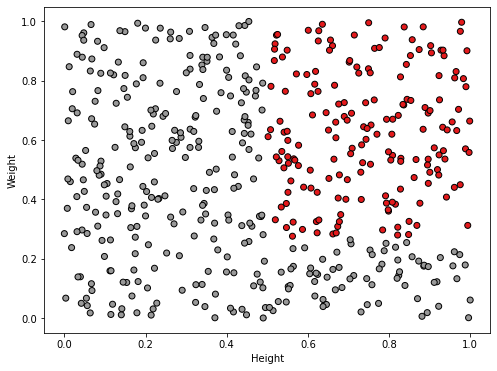

In [ ]:
#Using matplotlib -                         
t = Y2['Gender']
x_min, x_max = X2.iloc[:, 0].min() - .5, X2.iloc[:, 0].max() + .5
y_min, y_max = X2.iloc[:, 1].min() - .5, X2.iloc[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X2['Height'], X2['Weight'],c=t, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

<Figure size 576x432 with 0 Axes>

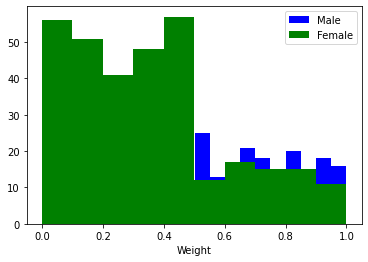

In [ ]:
X = X2
Y = Y2['Gender']
target_names=['Male','Female']
feature_names=['Height','Weight']
n_classes = 2
plt.figure(2, figsize=(8, 6))
plt.clf()
fig, ax = plt.subplots()
x_index = 1
colors = ['blue', 'green']

for label, color in zip(range(len(target_names)), colors):
    ax.hist(X2.loc[Y==label,"Height"], 
            label=target_names[label],
            color=color)

ax.set_xlabel(feature_names[x_index])
ax.legend(loc='upper right')
fig.show()

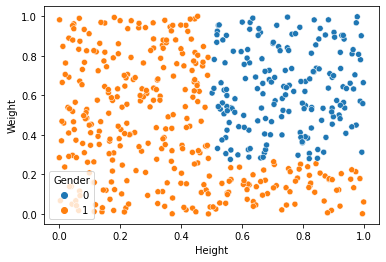

In [ ]:
import seaborn as sns
sns.scatterplot(x='Height',y='Weight',hue= Y2['Gender'],data=X2)

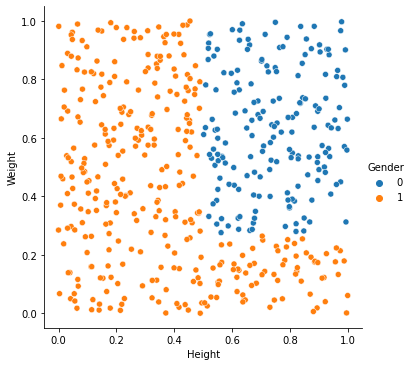

In [ ]:
sns.relplot(x='Height',y='Weight',hue = Y2['Gender'],data=X2)

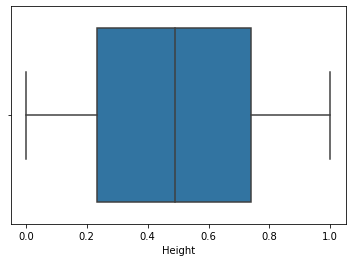

In [ ]:
sns.boxplot(x=X2['Height'])

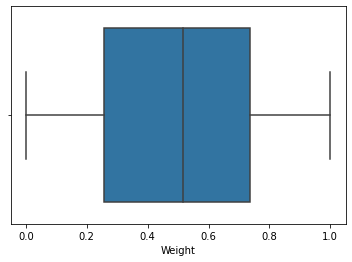

In [ ]:
sns.boxplot(x=X2['Weight'])

**We can observe range 0 to 1 from the plots used above since the data used for plots is minmax normalized.**

####***Repeating 1.b with normalized data***

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split( X2, Y2, test_size=0.2,random_state=4)
Y2_train = Y2_train.values.ravel()
Y2_test = Y2_test.values.ravel()
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# Let us randomly choose k value to see how the accuracy is 
k = 3  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X2_train,Y2_train)
Pred_Y2 = neigh.predict(X2_test)
print("Accuracy of model at K=3 is",metrics.accuracy_score(Y2_test, Pred_Y2))

Accuracy of model at K=3 is 0.98


Minimum error:- 0.0 at index = 0


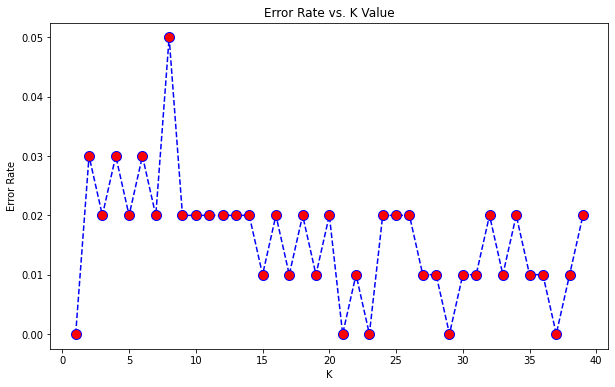

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X2_train,Y2_train)
 pred_i = knn.predict(X2_test)
 error_rate.append(np.mean(pred_i != Y2_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at index =",error_rate.index(min(error_rate)))

In [ ]:
k = 1  
knn = KNeighborsClassifier(n_neighbors = k).fit(X2_train,Y2_train)
Y2_pred = knn.predict(X2_test)
print("Accuracy : ",metrics.accuracy_score(Y2_test, Y2_pred))

Accuracy :  1.0


In [ ]:
print("Precision score : ", metrics.precision_score(Y2_test, Y2_pred, average='macro' ))

Precision score :  1.0


In [ ]:
print("Recall score : ", metrics.recall_score(Y2_test, Y2_pred, average='macro' ))

Recall score :  1.0


In [ ]:
print("F1 score : ", metrics.f1_score(Y2_test, Y2_pred, average='macro' ))

F1 score :  1.0


In [ ]:
print("Confusion matrix: \n",metrics.confusion_matrix(Y2_test,Y2_pred))

Confusion matrix: 
 [[34  0]
 [ 0 66]]


####***Inference (After scaling)***
*We are splitting the data set into train and test into 80-20 parts, meaning we use 80% of the data to train the dataset with the model and 20% of the data to test the model. K value for the KNN classifier is calculated using the Euclidean distance and that value of k that gives the minimum error rate is the optimal one. We then evaluate the model and find that the model is **1.0** accurate. Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The precision score for the model developed is **1.0**. Recall refers to the percentage of total relevant results correctly classified by your algorithm. The recall score of the model developed is **1.0**. F-score or F-measure is a measure of a test's accuracy. The f1 score obtained for this model is **1.0**. Confusion matrix C is such that Cij is equal to the number of observations known to be in group i and predicted to be in group j. Thus (0,0) represents (m, m); (0,1) represents (m, f); (1,0) represents (f,m) and (1,1) represents (f,f).*

###***d. Plot ROC curves and calculate the corresponding AUC values for Section 1. c and discuss what you observe***

####1.c

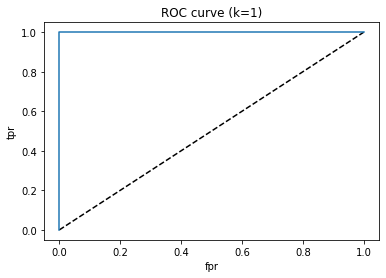

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y2_test, Y2_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve (k=1)')
plt.show()

In [ ]:
print("AUC : ", metrics.roc_auc_score(Y2_test,Y2_pred))

AUC :  1.0


#####***Inference***
*ROC is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test. The closer the curve is in the upper diagonal, the more accurate the test. The area under the curve is a measure of test accuracy. Thus we can say that the model is **100%** accurate.*

#**Conclusion**
*The algorithm we are using here is KNN classifier which is a distance based algorithm. In distance based algorithms, normalization affects the accuracy of the model. It improves the numerical stability of the model and often reduces training time. Thus, we can see that the dataset works well on the model developed when it is normalized. We can see how range differs in the dataset.*